## **Text Classification using Naive Bayes classifier**

In this notebook, we will use Niave Bayes classifier for classifying text. 

Naive bayes is used for text classification & spam detection tasks. 

Here is an example as to how to perform the text classification with Naive Bayes Classifier.

In [1]:
import numpy as np 

# data loading  
from sklearn.datasets import fetch_20newsgroups 

# preprocessing 
from sklearn.feature_extraction.text import TfidfVectorizer 

# model / estimator 
from sklearn.naive_bayes import MultinomialNB 

# pipeline utilty 
from sklearn.pipeline import Pipeline 

# model evaluation 
from sklearn.metrics import ConfusionMatrixDisplay 

# plotting 
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()

### **Getting dataset** 
We will be using 20 newsgroup dataset for classification.

As a first step, let's download 20 newsgroup dataset with `fetch_20newsgroup` API. 

In [2]:
data = fetch_20newsgroups()

Lets look at the name of the classes. 

In [3]:
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

There are **20 categories** in the dataset. For simplicity, we will select **4** of these categories and download their training and test set.

In [4]:
categories = ['talk.religion.misc',
              'soc.religion.christian', 'sci.space', 'comp.graphics']

train = fetch_20newsgroups(subset='train' ,categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

Lets look at a sample training document :

In [5]:
print(train.data[1])

From: MANDTBACKA@finabo.abo.fi (Mats Andtbacka)
Subject: Re: If There Were No Hell
Organization: Unorganized Usenet Postings UnInc.
Lines: 26

In <May.5.02.51.25.1993.28737@athos.rutgers.edu> shellgate!llo@uu4.psi.com writes:

> Here's a question that some friends and I were debating last night.
> Q: If you knew beyond all doubt that hell did not exist and that
>    unbelievers simply remained dead, would you remain a Christian?

      (Reasoning pertinent to believing Xians deleted for space)

      It strikes me, for no apparent reason, that this is reversible.
I.e., if I had proof that there existed a hell, in which I would be
eternally punished for not believing in life, would that make me a Xian?
(pardon my language) _Bloody_hell_no_!

      ...Of course, being merely a reversal of your thinking, this
doesn't add anything _new_ to the debate, but...

> Several friends disagreed, arguing the fear of hell was necessary
> to motivate people to Christianity. To me that fatally undercu

This data is different than what we have seen so far. Here the training data contains document in text form.

### **Data Preprocessing and Modeling**

As we have mentioned in the first week of MLT, we need to convert th text data to numeric form. 

* `TfidfVectorizer` is one such API that converts text input into a vector of numerical values. 

* We will use `TfidfVectorizer` as as preprocessing step to obtain feature vector corresponding to the text document. 

* We will be using `MultinomialNB` classifier for categorizing documents from 20 newsgroup corpus.

In [6]:
from sklearn.pipeline import make_pipeline
model = make_pipeline(TfidfVectorizer() ,MultinomialNB())

Lets train the model.

In [7]:
model.fit(train.data ,train.target)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

### **Model Evaluation** 
Lets first predict the labels for the test set and then calculate the confusion matrix for th test set.

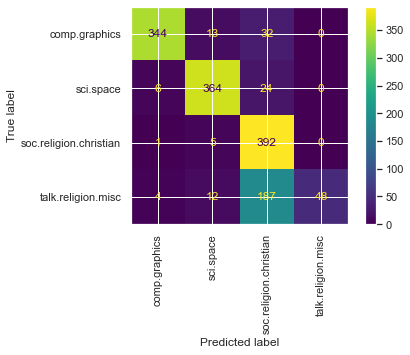

In [8]:
ConfusionMatrixDisplay.from_estimator(model, test.data ,test.target ,display_labels=test.target_names ,xticks_rotation='vertical')

plt.show()

**Obsereve that** :  

* There is a confusion between the documents of class `soc.religion.christian` and `talk.religion.misc` ,which is along the expected lines. 

* The classes `comp.graphics` and `sci.space` are well separated by such a simple classifier.

Now we have the tool to classify statements into one of these four classes. 

* Make use of `predict` function on pipeline for predicting category of a test string. 

In [9]:
def predict_category(s, train=train ,model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

Using the function of prediction : 

In [10]:
predict_category('sending a payload to the ISS')

'sci.space'

In [11]:
predict_category('what is your screen resolution')

'comp.graphics'

In [12]:
predict_category('the Seven Sacraments are')


'soc.religion.christian'

In [13]:
predict_category('discussing islam')

'soc.religion.christian'

Here we can observe the confusion between the classes of `soc.religion.christian` and `talk.religion.misc` mentioned previously.